In [1]:
import numpy as np
import pandas as pd
import Conect2ai as c2ai

ModuleNotFoundError: No module named 'Conect2ai'

In [157]:
# define the dictionary to hold the experiment results
exp_compression_report = {}
exp_statistics_report = {}

In [159]:
# read csv file
df = pd.read_csv('data/_tmp_original.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50879 entries, 0 to 50878
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time     50879 non-null  int64
 1   voltage  50879 non-null  int64
dtypes: int64(2)
memory usage: 795.1 KB


<Axes: >

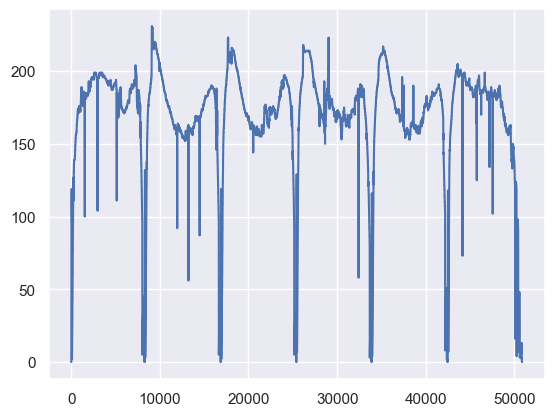

In [160]:
df['voltage'].plot()

## Running TAC


Setting up the initial variables 

In [161]:
# first create a model name (not necessary but useful for saving)
model_name = 'TAC_Voltage_data'

# Create the params dictionary (actually necessary)
params = {
    'window_size': np.arange(1, 41, 1),
    'm': np.round(np.arange(0.1, 0.8, 0.1), 2),
}

param_combination = create_param_combinations(params)
compressor_list = create_compressor_list(param_combination)

print(len(compressor_list), 'compressors created')

280 compressors created


Run multiples TAC tests and save the results on a dataset

In [166]:
result_df = run_multiple_instances(compressor_list=compressor_list, 
                                param_list=param_combination,
                                series_to_compress=df['voltage'].dropna(),
                                cf_score_beta=2
                                )


result_df.head(8)

,param,reduction_rate,reduction_factor,mse,rmse,nrmse,mae,psnr,ncc,cf_score
0,"(1, 0.1)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
1,"(1, 0.2)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
2,"(1, 0.3)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
3,"(1, 0.4)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
4,"(1, 0.5)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
5,"(1, 0.6)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
6,"(1, 0.7)",0.72,3.62,12.32,3.51,0.09,0.44,36.37,1.00,0.91
7,"(2, 0.1)",0.79,4.74,16.23,4.03,0.10,0.58,35.17,0.99,0.93


Visualize multirun results with a plot

In [167]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   param             280 non-null    object 
 1   reduction_rate    280 non-null    float64
 2   reduction_factor  280 non-null    float64
 3   mse               280 non-null    float64
 4   rmse              280 non-null    float64
 5   nrmse             280 non-null    float64
 6   mae               280 non-null    float64
 7   psnr              280 non-null    float64
 8   ncc               280 non-null    float64
 9   cf_score          280 non-null    float64
dtypes: float64(9), object(1)
memory usage: 24.1+ KB


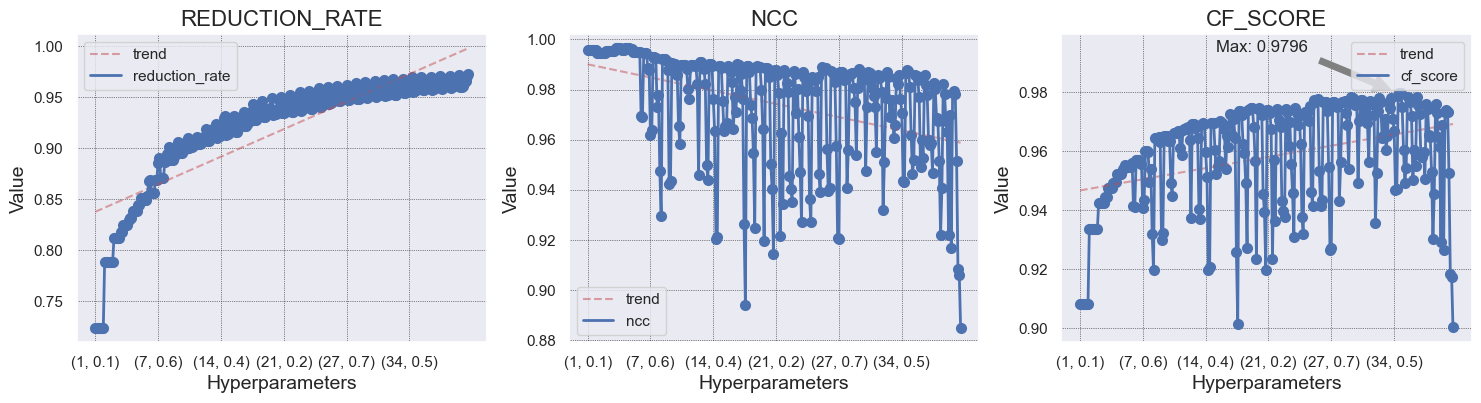

In [172]:
plot_multirun_metric_results(result_df=result_df)

Visualize multirun results with dataset

In [187]:
display_multirun_optimal_values(result_df=result_df)

Parameter combinations for  MAX CF_SCORE


         param  reduction_rate  reduction_factor   mse  rmse  nrmse  mae   
239  (35, 0.2)            0.96             22.86 37.25  6.10   0.16 1.35  \
240  (35, 0.3)            0.96             23.30 38.06  6.17   0.16 1.39   

     psnr  ncc  cf_score  
239 31.56 0.99      0.98  
240 31.47 0.99      0.98  
Parameter combinations for NEAR  MAX CF_SCORE


         param  reduction_rate  reduction_factor   mse  rmse  nrmse  mae   
99   (15, 0.2)            0.91             11.61 32.59  5.71   0.15 1.05  \
215  (31, 0.6)            0.96             27.59 82.61  9.09   0.23 2.53   
157  (23, 0.4)            0.94             17.06 60.59  7.78   0.20 1.59   
105  (16, 0.1)            0.92             11.87 32.77  5.72   0.15 1.04   
171  (25, 0.4)            0.95             18.24 62.56  7.91   0.20 1.69   

     psnr  ncc  cf_score  
99  32.14 0.99      0.97  
215 28.10 0.97      0.97  
157 29.45 0.98      0.97  
105 32.12 0.99      0.97  
171 29.

### Running with the optimal parameters


In [174]:
optimal_param_list = get_optimal_params(result_df=result_df)
print("Best compressor param combination: ", optimal_param_list)

Best compressor param combination:  [(35, 0.2), (35, 0.3)]


In [176]:
points_to_keep, optimal_results_details = run_optimal_combination(optimal_list=optimal_param_list,
                                                          serie_to_compress=df['voltage'].dropna(),
                                                          model='TAC'
                                                          )

In [177]:
print_run_details(optimal_results_details)

POINTS:
 - total checked:  50879
 - total kept:  1114
 - percentage discaded:  97.81 %

POINT EVALUATION TIMES (ms): 
 - mean:  0.0021414514134244587
 - std:  0.046957627024743445
 - median:  0.0
 - max:  1.5192031860351562
 - min:  0.0
 - total:  108.95490646362305

RUN TIME (ms):
 - total:  119.3452


### Evaluating the results

Set up the evaluation dataframe

In [179]:
evaluation_df = create_eval_df(original=df['voltage'].dropna(), flag=points_to_keep)
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50879 entries, 0 to 50878
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   original      50879 non-null  int64  
 1   compressed    1114 non-null   float64
 2   decompressed  50879 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.2 MB


In [180]:
evaluation_df.head()

,original,compressed,decompressed
0,0,0.00,0.00
1,0,NaN,1.87
2,0,NaN,3.75
3,0,NaN,5.62
4,0,NaN,7.49


Evaluation performance

In [183]:
# create dictionary report 
report = get_compression_report(
    original=evaluation_df['original'],
    compressed=evaluation_df['compressed'],
    decompressed=evaluation_df['decompressed'],
    cf_score_beta=2
)

print_compression_report(
    report, 
    model_name=model_name,
    cf_score_beta=2,
    model_params=optimal_param_list
)

# Save the report to a dictionary
exp_compression_report[model_name] = report


# RUN INFO #
- Model:  TAC_Voltage_data
- Optimal Params:  [(35, 0.2), (35, 0.3)]
- CF-Score Beta:  2

# RESULTS #

SAMPLES NUMBER reduction
- Original length:  50879  samples
- Reduced length:  1114  samples
- Samples reduced by a factor of 45.67 times
- Sample reduction rate: 97.81%

FILE SIZE compression
- Original size:  544858  Bytes
- Compressed size:  14165  Bytes
- file compressed by a factor of 38.47 times
- file compression rate: 97.4%

METRICS
- MSE:  41.3406
- RMSE:  6.4297
- NRMSE:  0.164
- MAE:  1.4593
- PSNR:  31.1085
- NCC:  0.9865
- CF-Score:  0.984


In [184]:
model_stats = calc_statistics(evaluation_df)

# save the statistics to a dictionary
exp_statistics_report[model_name] = model_stats
model_stats

,min,max,mean,median,std,skewness,kurtosis
original,0.00,231.00,169.74,177.00,39.20,-2.63,7.71
decompressed,0.00,229.00,169.76,177.43,38.80,-2.58,7.32


### Creating the model visualizations

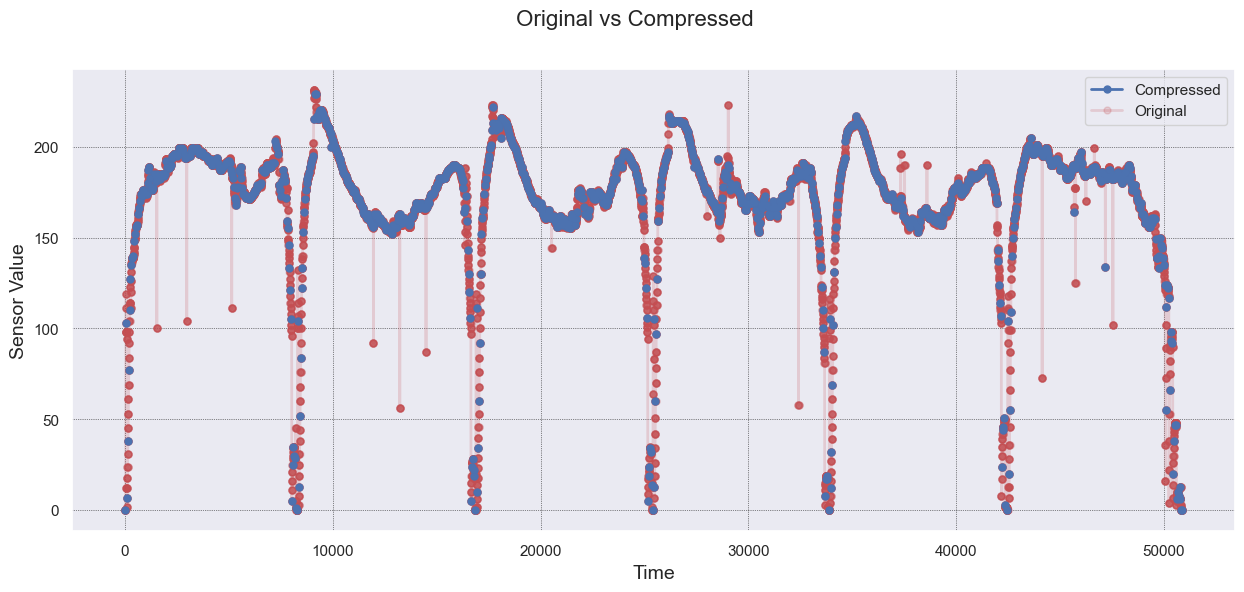

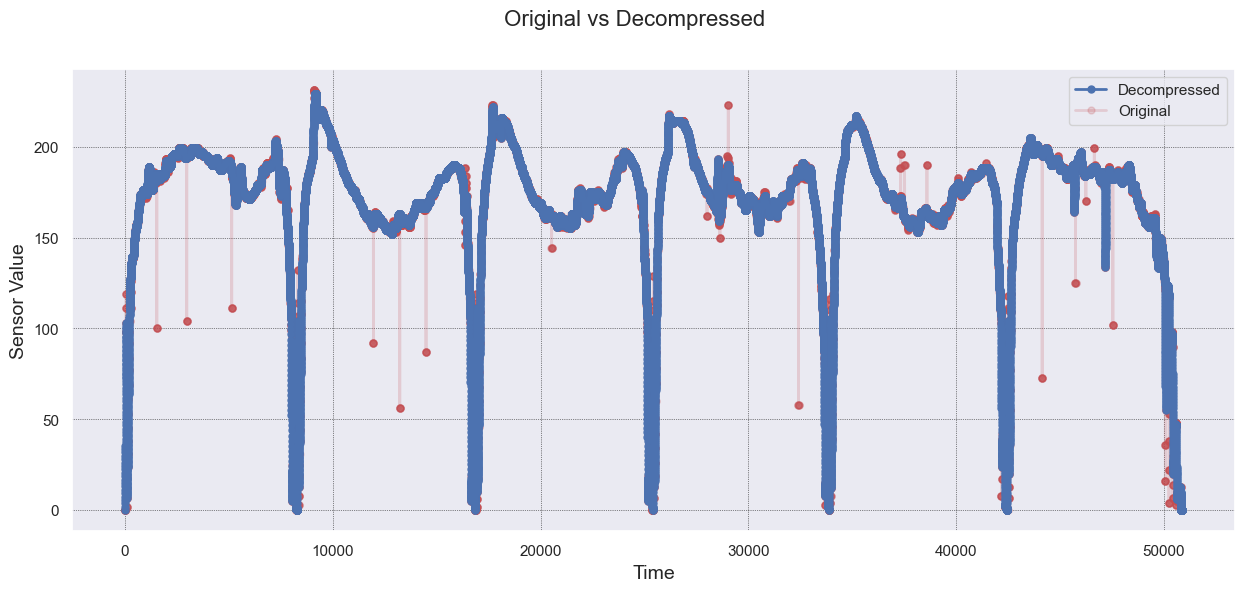

In [185]:
# plot the curves comparison (original vs compressed)
plot_curve_comparison(
    evaluation_df.original,
    evaluation_df.compressed,
    show=True
)


# plot the curves comparison (original vs decompressed)
plot_curve_comparison(
    evaluation_df.original,
    evaluation_df.decompressed,
    show=True
)

c:\Users\Miguel\Documents\UFRN - PESQUISA\LIB-TAC\Prep\src\utils\plots.py:88: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processed, label=processed_name, ax=ax[0])
c:\Users\Miguel\Documents\UFRN - PESQUISA\LIB-TAC\Prep\src\utils\plots.py:89: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


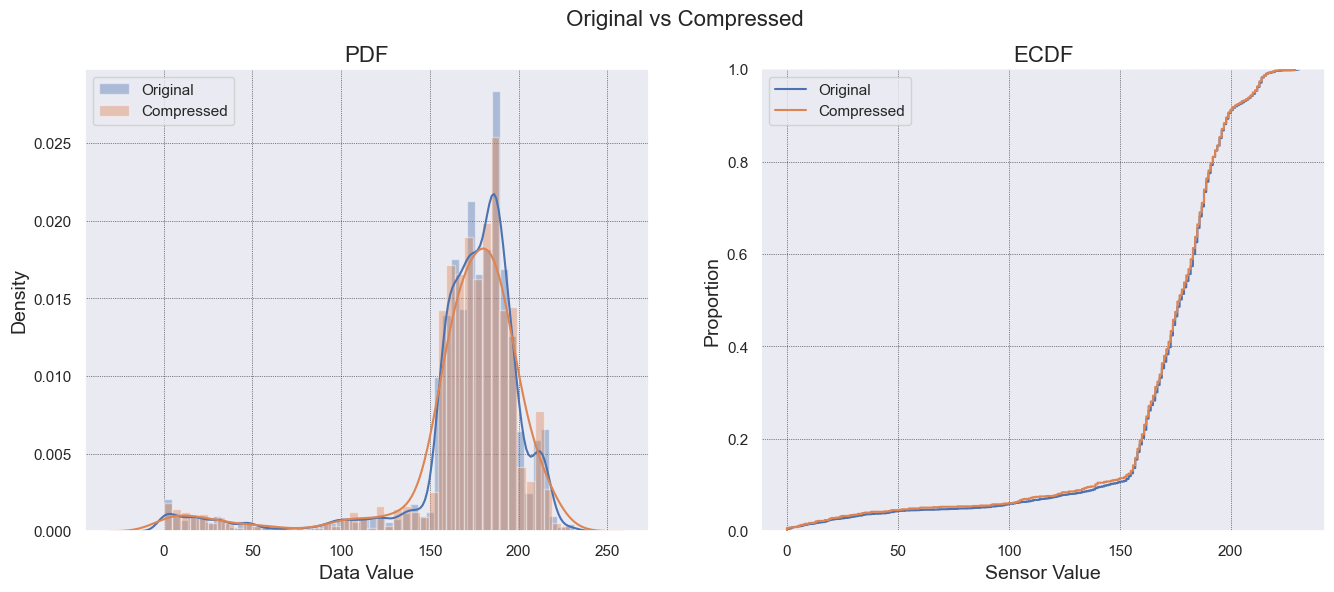

c:\Users\Miguel\Documents\UFRN - PESQUISA\LIB-TAC\Prep\src\utils\plots.py:88: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processed, label=processed_name, ax=ax[0])
c:\Users\Miguel\Documents\UFRN - PESQUISA\LIB-TAC\Prep\src\utils\plots.py:89: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


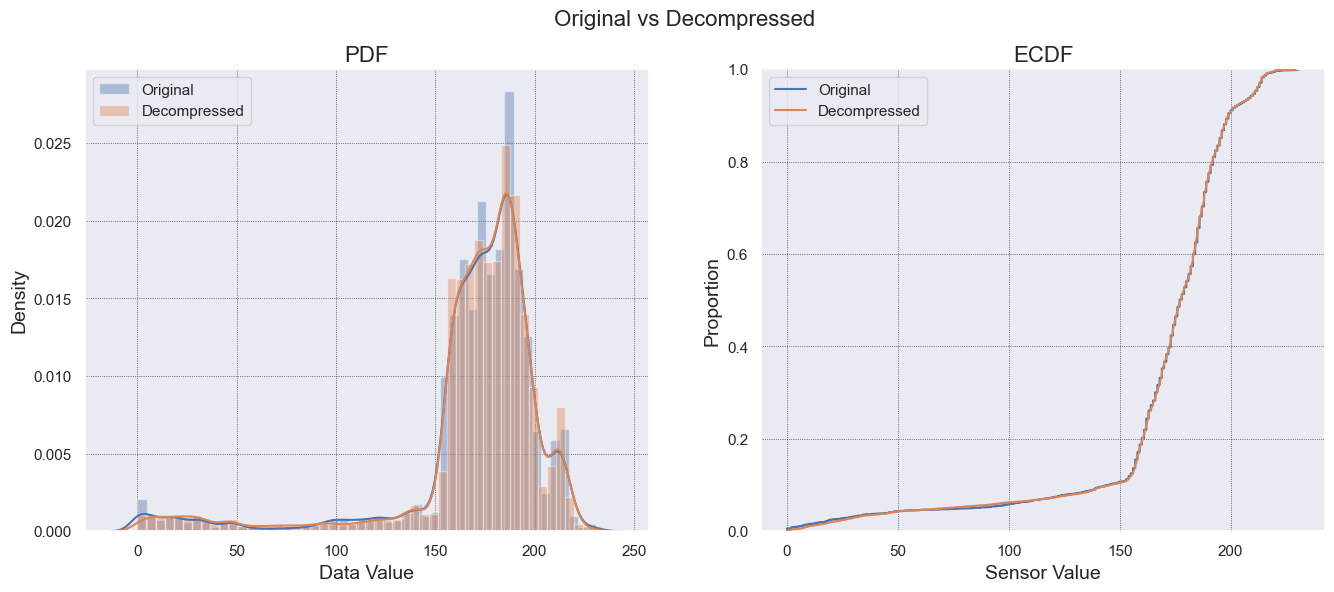

In [186]:
#compressed_dist_path = f'./results/{exp_number}/cf{exp_beta}_run/{model_name}__DIST_orig-v-comp.png'
#decompressed_dist_path = f'./results/{exp_number}/cf{exp_beta}_run/{model_name}__DIST_orig-v-decomp.png'

plot_dist_comparison(
    evaluation_df.original,
    evaluation_df.compressed,
    show=True
)
plot_dist_comparison(
    evaluation_df.original,
    evaluation_df.decompressed,
    show=True
)